## Near State-of-the-Art results at Object Recognition


In this project, we will be deploying a convolutional neural network (CNN) for object recognition. More specifically, we will be using the All-CNN network published in the 2015 ICLR paper, "Striving For Simplicity: The All Convolutional Net".  This paper can be found at the following link:

https://arxiv.org/pdf/1412.6806.pdf

This convolutional neural network obtained state-of-the-art performance at object recognition on the CIFAR-10 image dataset in 2015. We will build this model using Keras, a high-level neural network application programming interface (API) that supports both Theano and Tensorflow backends. You can use either backend; however, I will be using Theano.  

In this project, we will learn to:
* Import datasets from Keras
* Use one-hot vectors for categorical labels
* Addlayers to a Keras model
* Load pre-trained weights
* Make predictions using a trained Keras model

The dataset we will be using is the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

### 1. Loading the Data

Let's dive right in! In these first few cells, we will import necessary packages, load the dataset, and plot some example images.

In [1]:
# Load necessary packages
from keras.datasets import cifar10

from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [3]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


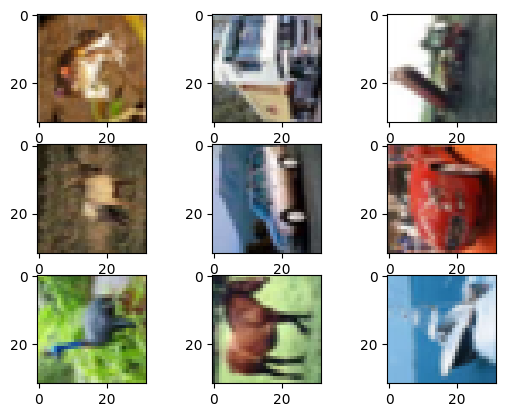

In [6]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i].transpose([1,0,2])
    plt.imshow(img)
    
# show the plot
plt.show()

### 2. Preprocessing the dataset

First things first, we need to preprocess the dataset so the images and labels are in a form that Keras can ingest. To start, we'll define a NumPy seed for reproducibility, then normalize the images. 

Furthermore, we will also convert our class labels to one-hot vectors.  This is a standard output format for neural networks. 

In [7]:
# fix random seed for reproducibility
seed = 6
np.random.seed(seed) 

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


The class labels are a single integer value (0-9).  What we really want is a one-hot vector of length ten.  For example, the class label of 6 should be denoted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0].  We can accomplish this using the np_utils.to_categorical() function.

In [13]:
# hot encode outputs
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_test =to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 3. Building the All-CNN

Using the paper as a reference, we can implement the All-CNN network in Keras.  Keras models are built by simply adding layers, one after another. 

To make things easier for us later, we will wrap this model in a function, which will allow us to quickly and neatly generate the model later on in the project. 

In [14]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(3, 32, 32)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model

### 4. Defining Parameters and Training the Model

We're all set! We are ready to start training our network.  In the following cells, we will define our hyper parameters, such as learning rate and momentum, define an optimizer, compile the model, and fit the model to the training data.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD

def allcnn(weights=None):
    model = Sequential()

    model.add(Conv2D(96, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding='same', strides=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding='same', strides=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding='valid'))

    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))

    if weights:
        model.load_weights(weights)

    return model


# Hyperparameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9
epochs = 1
batch_size = 32

# Build model
model = allcnn()

# Compile
sgd = SGD(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

# Train
model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
          epochs=epochs, batch_size=batch_size, verbose=1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 16, 16, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 16, 16, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 8, 8, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 8, 8, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 8, 8, 192)      │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 8, 8, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 10)       │         1,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,369,738 (5.23 MB)

 Trainable params: 1,369,738 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

None
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 537s 343ms/step - accuracy: 0.1676 - loss: 2.1752 - val_accuracy: 0.3103 - val_loss: 1.8907
